In [48]:
#Importing libraries 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import linregress

# Load the dataset
df = pd.read_csv(r'C:\Users\SowmiS\Downloads\Credit Card Customers\BankChurners.csv')



In [31]:
# Displaying basic information 
print("Dataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns)
print("\nData Types:\n", df.dtypes)
print("\nFirst few rows of the dataset:\n", df.head())

# Compute summary statistics of the data
summary_stats = df.describe()

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

#
df.info()

Dataset Shape: (10127, 23)

Column Names:
 Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

Data Types:
 CLIENTNUM                                                                                                                               int64
Attrition_Flag                    

In [12]:
# Exploratory Data Analysis (EDA)
print(df.head())
print(df.info())
print(df.describe())


   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1       

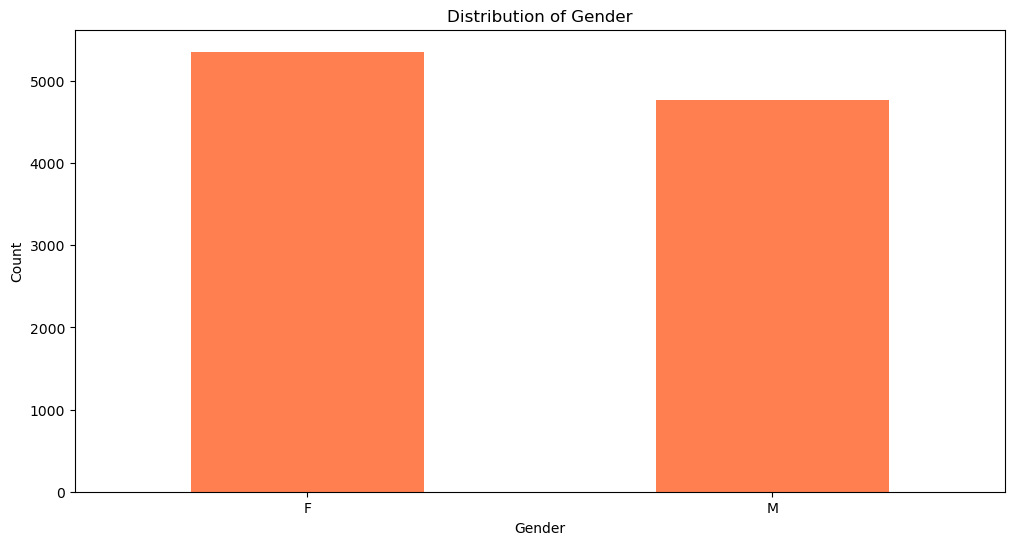

In [43]:
# Data Visualization

## Histogram/Bar Chart/Pie Chart
plt.figure(figsize=(12, 6))
df['Gender'].value_counts().plot(kind='bar', color='coral')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.savefig("bar_plot.png")
plt.show()

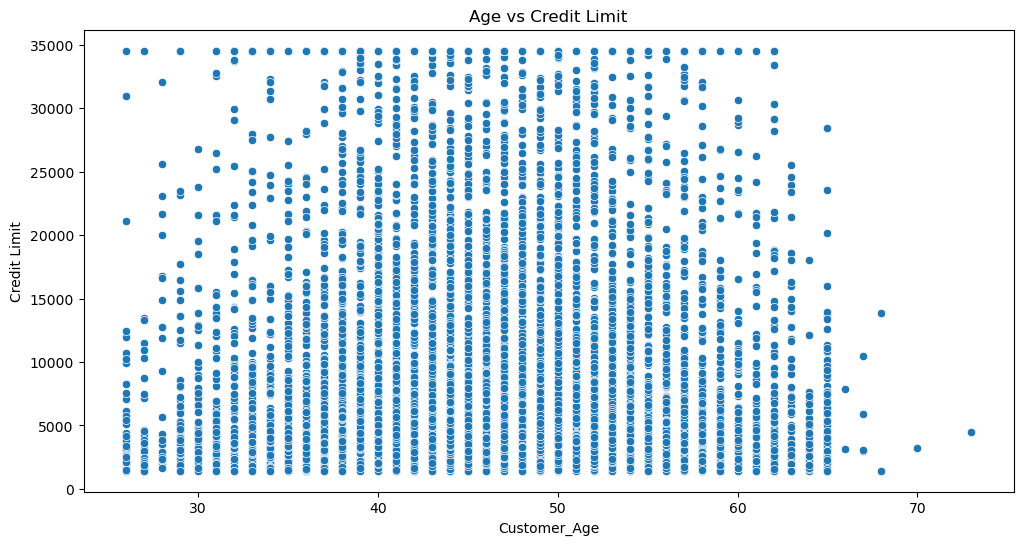

In [49]:
## Line/Scatter Graph
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Customer_Age', y='Credit_Limit', data=df)
plt.title('Age vs Credit Limit')
plt.xlabel('Customer_Age')
plt.ylabel('Credit Limit')
plt.savefig("scatter_plot.png")
plt.show()



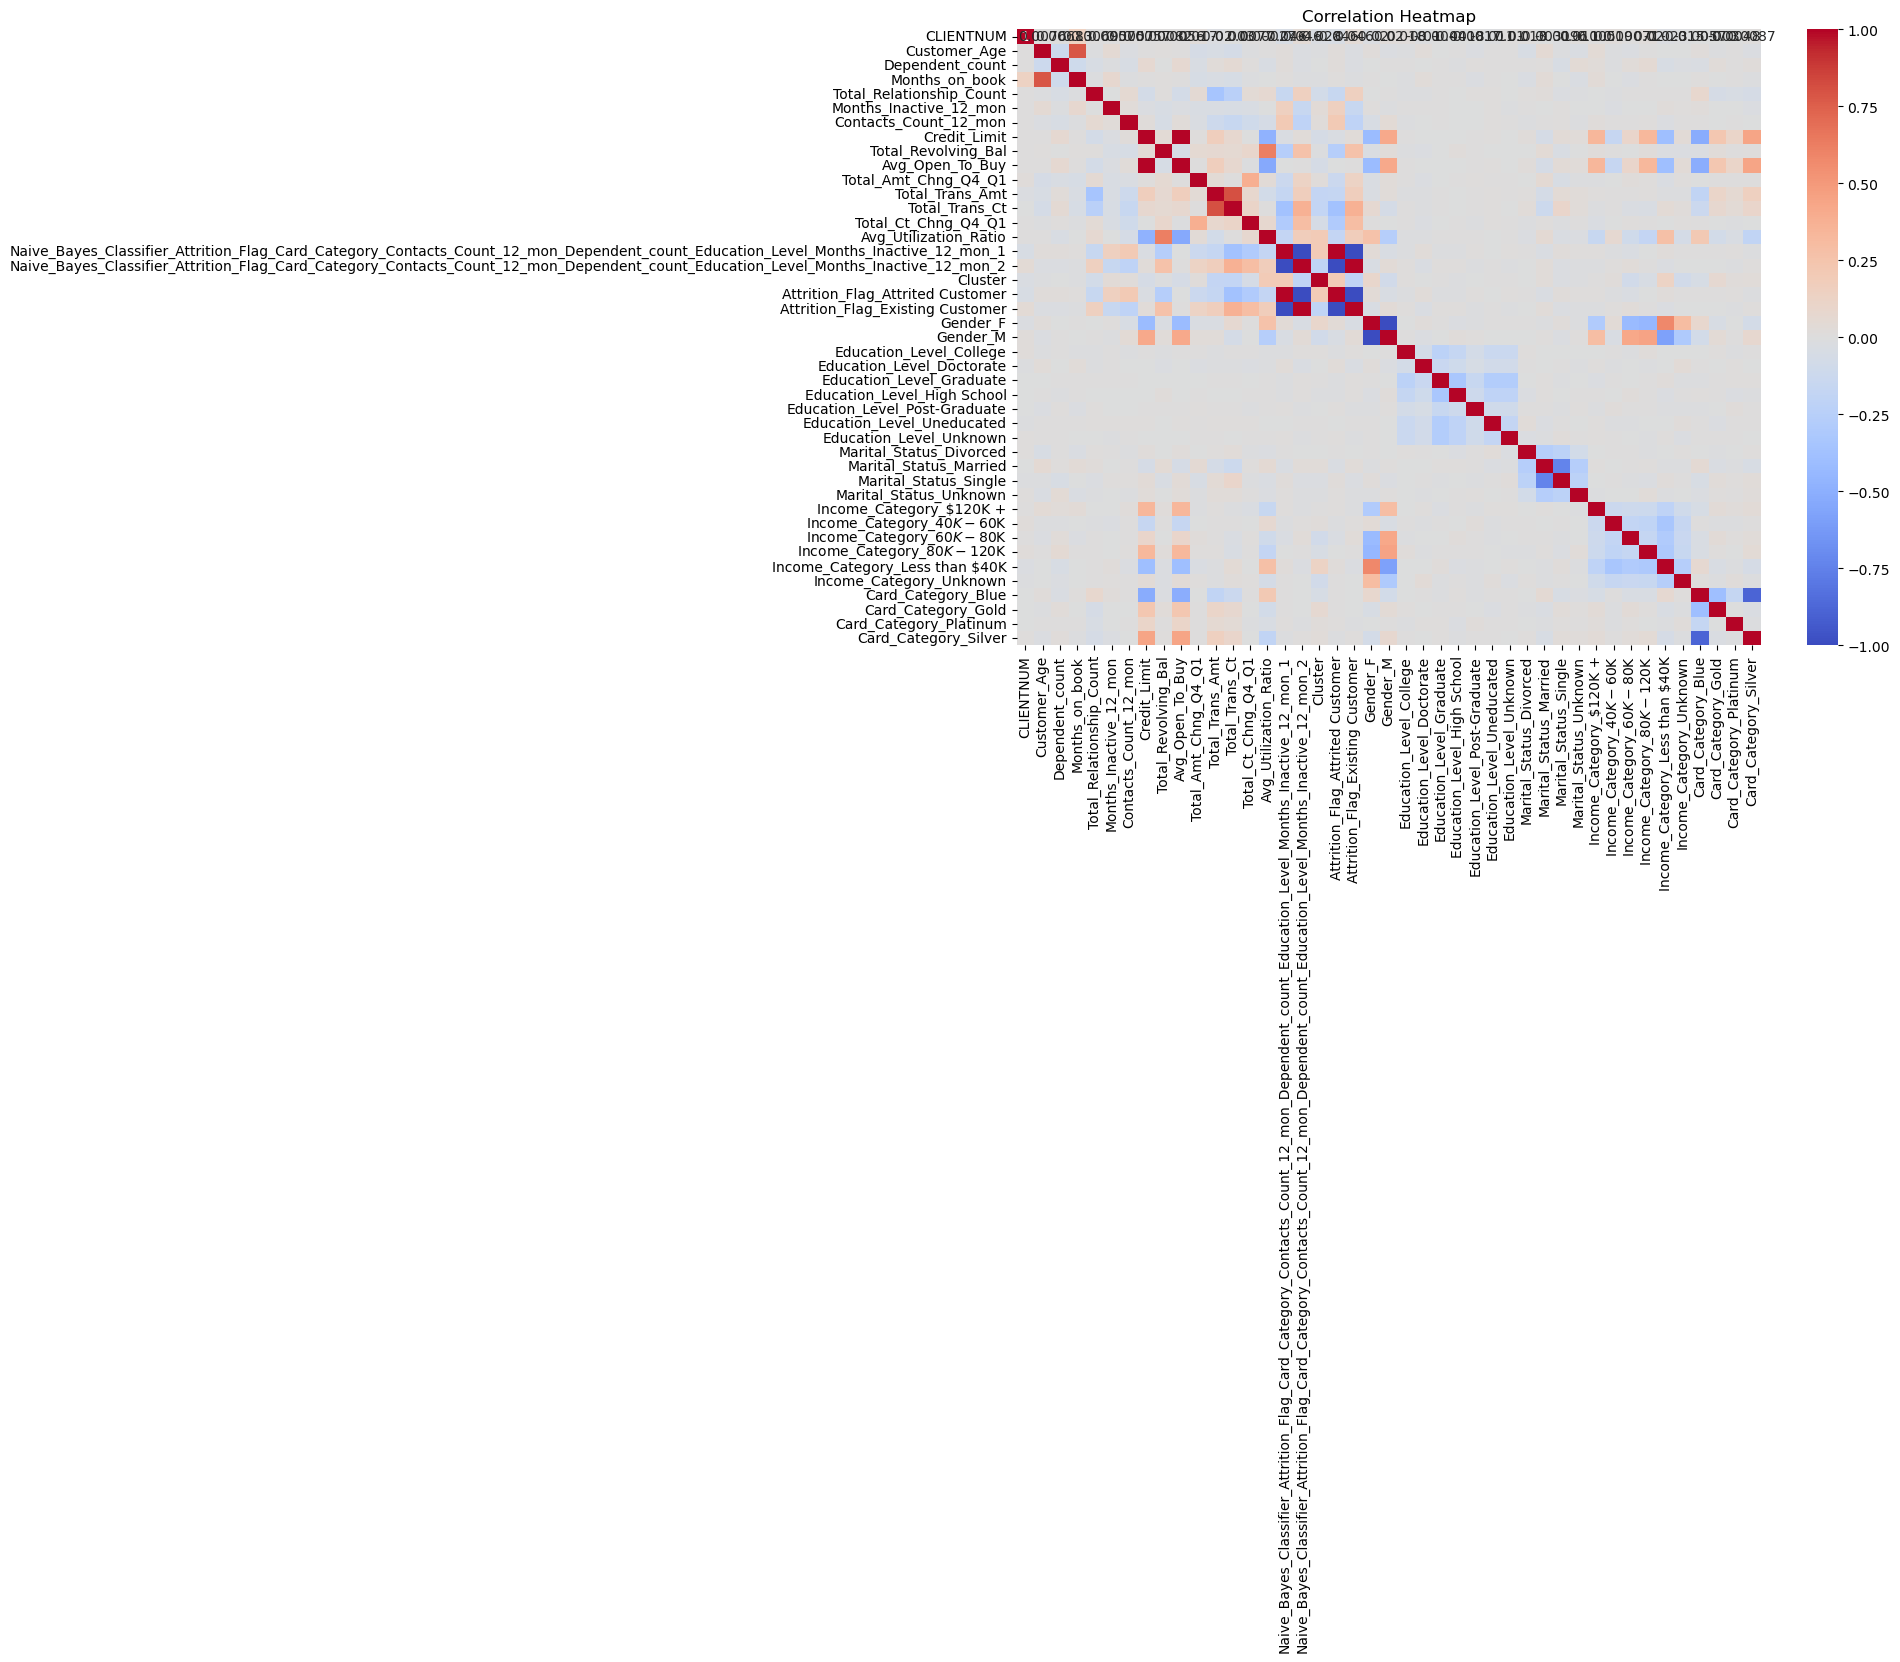

In [44]:
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df)

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig("Correlation_Heatmap.png")
plt.show()


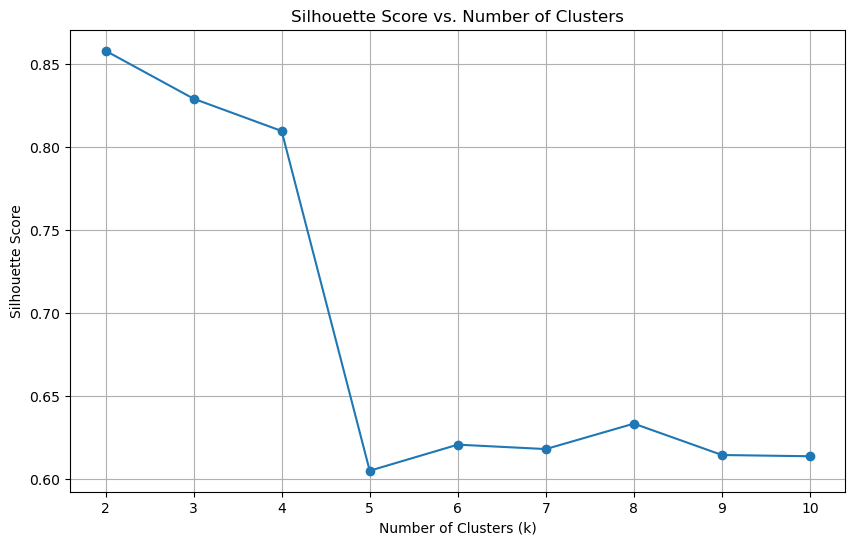

In [45]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

df_processed = pd.get_dummies(df)

# Performing k-means clustering with different values of k
k_values = range(2, 11)
silhouette_scores = []

# Iterate over each K value and compute the silhouette score
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  
    cluster_labels = kmeans.fit_predict(df_processed)  
    silhouette_avg = silhouette_score(df_processed, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.savefig("Silhoutte_Score")
plt.show()


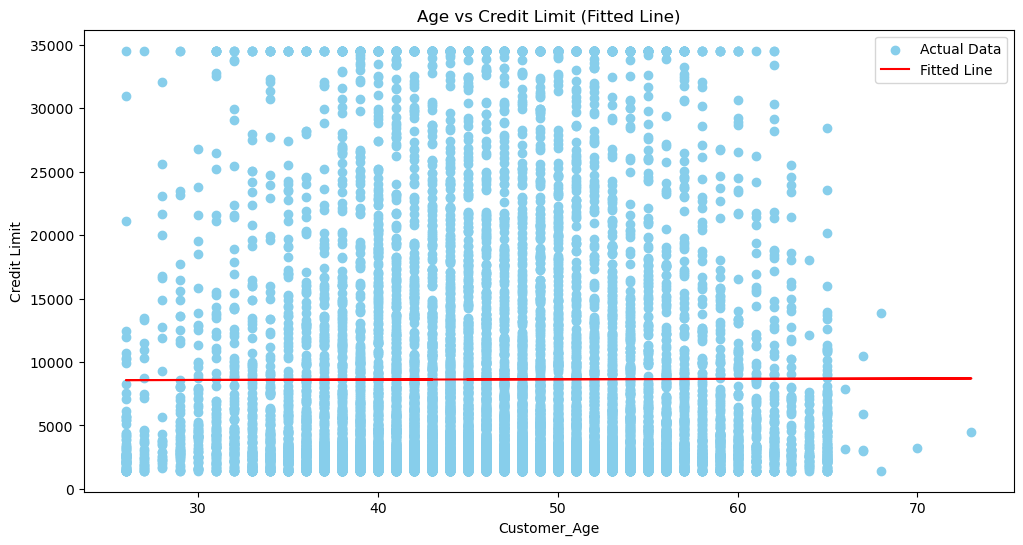

In [46]:

# Clustering
kmeans = KMeans(n_clusters=k, random_state=42 ,n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Fitting
X_fit = df['Customer_Age'].values.reshape(-1, 1)
y_fit = df['Credit_Limit'].values

lin_reg = LinearRegression()
lin_reg.fit(X_fit, y_fit)

slope, intercept, _, _, _ = linregress(df['Customer_Age'], df['Credit_Limit'])

# Plotting the fitted line
plt.figure(figsize=(12, 6))
plt.scatter(df['Customer_Age'], df['Credit_Limit'], color='skyblue', label='Actual Data')
plt.plot(df['Customer_Age'], lin_reg.predict(X_fit), color='red', label='Fitted Line')
plt.title('Age vs Credit Limit (Fitted Line)')
plt.xlabel('Customer_Age')
plt.ylabel('Credit Limit')
plt.legend()
plt.savefig("Fitted_Line.png")
plt.show()